<h1>Create NumPy arrays using Python's "array like" data types</h1>


In [0]:
import numpy as np 
print(np.__version__)

1.16.4


In [0]:
my_list = [-17, 0, 4, 5, 29]
np_array=np.array(my_list)
print(np_array) 

[-17   0   4   5  29]


## multiply * works differently between python types and np typy

In [0]:
my_list_10x=my_list*10
print(my_list_10x)
np_array_10x=np_array*10
print(np_array_10x)

[-17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29]
[-170    0   40   50  290]


##complex and tuple

In [0]:
tupleToNumpy=(14, -3.14, 4+3j); tupleToNumpy2=(-14, 3.21)  #int, float, complex, np array keeps elements of array uniform
numpyFromTuple=np.array(tupleToNumpy)
numpyFromTuple2=np.array(tupleToNumpy2)
print(numpyFromTuple)
print(numpyFromTuple2)


[14.  +0.j -3.14+0.j  4.  +3.j]
[-14.     3.21]


##simple methods

In [0]:
# numpy.arange([start, ]stop, [step, ]dtype=None) official url by google np.arange
np.arange(10,30,2)*10-3

array([ 97, 117, 137, 157, 177, 197, 217, 237, 257, 277])

In [0]:
np.arange(20,step=4)

array([ 0,  4,  8, 12, 16])

In [0]:
nparray=(np.arange(10,30,2)-3)*10
nparray

array([ 70,  90, 110, 130, 150, 170, 190, 210, 230, 250])

In [0]:
nparray.size # this only gives number of elements

10

In [0]:
np.linspace(0,30,10,True)

array([ 0.        ,  3.33333333,  6.66666667, 10.        , 13.33333333,
       16.66666667, 20.        , 23.33333333, 26.66666667, 30.        ])

##indexing, shaping (dimension) and slicing

In [0]:
z=np.zeros(20)
z[10]

0.0

In [0]:
z[10]=9;z[0]=10; z[-1]=7.5; z[-2]=-2.1
z

array([10. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  9. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -2.1,  7.5])

In [0]:
o=np.ones((3,3), dtype=int)
o

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [0]:
z.shape=(4,5)
z

array([[10. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 9. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -2.1,  7.5]])

In [0]:
z.shape=(2,2,5)   #convert from 2-d to 3-d np array
z

array([[[10. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ]],

       [[ 9. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -2.1,  7.5]]])

In [0]:
z[1][1]

array([ 0. ,  0. ,  0. , -2.1,  7.5])

In [0]:
z[1,0][0]

9.0

In [0]:
z[0]

array([[10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [0]:
print(z)
print(z.ndim) #show dimension
print(z.size) #show total elements
print(z[0].shape) #show actual metrics shape
print(z.dtype) # show data type in the metrix
print(z.sum()) # sum all the elements in metrix. this can be used in combination with filters(boolean mask array below
print(z.sum(axis=1)) # will learn this in broadcasting - operation along axis

[[[10.   0.   0.   0.   0. ]
  [ 0.   0.   0.   0.   0. ]]

 [[ 9.   0.   0.   0.   0. ]
  [ 0.   0.   0.  -2.1  7.5]]]
3
20
(2, 5)
float64
24.4
[[10.   0.   0.   0.   0. ]
 [ 9.   0.   0.  -2.1  7.5]]


## boolean mask array

In [0]:
nparray

array([ 70,  90, 110, 130, 150, 170, 190, 210, 230, 250])

In [0]:
can_div_35_mask = 0 == (nparray % 35)
can_div_35_mask

array([ True, False, False, False, False, False, False,  True, False,
       False])

In [0]:
filtered_nparray = nparray[can_div_35_mask]
filtered_nparray

array([ 70, 210])

In [0]:
further_filtered_nparray=filtered_nparray[filtered_nparray>70]
further_filtered_nparray

array([210])

In [0]:
nparray[nparray>200]  #simpler filter

array([210, 230, 250])

In [0]:
can_div_15_mask = 0 == (nparray % 15)
print(can_div_15_mask)
print(can_div_35_mask)

[False  True False False  True False False  True False False]
[ True False False False False False False  True False False]


In [0]:
#boolean operator
can_div_15_35_mask=np.logical_and(can_div_15_mask, can_div_35_mask)
can_div_15_35_mask

array([False, False, False, False, False, False, False,  True, False,
       False])

In [0]:
nparray[can_div_15_35_mask]

array([210])

## Broadcasting

In [0]:
array_3d = np.arange(70)
array_3d.shape=(2,7,5)
array_3d

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]],

       [[35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69]]])

In the context of deep learning, we also use some less conventional notation. We allow the addition of matrix and a vector, yielding another matrix: C = A + b, where Ci,j = Ai,j + bj. In other words, the vector b is added to each row of the matrix. This shorthand eliminates the need to define a matrix with b copied into each row before doing the addition. This implicit copying of b to many locations is called broadcasting.

In [0]:
x=np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))
print('x=', x)
print('')
print("\033[1;31;46m reshape from 1x4 to 4x1 ") #color reference from https://ozzmaker.com/add-colour-to-text-in-python/ 
print("\033[1;31;0m ")
print('xx=', xx)
print('y=',y)
print(y+xx)

('x=', array([0, 1, 2, 3]))

 reshape from 1x4 to 4x1 
 
('xx=', array([[0],
       [1],
       [2],
       [3]]))
('y=', array([1., 1., 1., 1., 1.]))
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


In [0]:
xx-x

array([[ 0, -1, -2, -3],
       [ 1,  0, -1, -2],
       [ 2,  1,  0, -1],
       [ 3,  2,  1,  0]])

To not use broadcasting, manual conversion is beow

In [0]:
x2d=[0, 1, 2, 3]*4
x2dnp=np.array(x2d).reshape(4,4)

In [0]:
lista=[0,0,0,0]
listb=[1,1,1,1]
listc=[2,2,2,2]
listd=[3,3,3,3]

xx2dnp = np.array(lista+listb+listc+listd).reshape(4,4)

In [0]:
xx2dnp-x2dnp

array([[ 0, -1, -2, -3],
       [ 1,  0, -1, -2],
       [ 2,  1,  0, -1],
       [ 3,  2,  1,  0]])

### operations along axis

In [0]:
array_3d

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]],

       [[35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69]]])

In [0]:
array_3d.shape

(2, 7, 5)

In [0]:
array_3d.sum(axis=0) # this is array_3d[0]+array_3d[1]

array([[ 35,  37,  39,  41,  43],
       [ 45,  47,  49,  51,  53],
       [ 55,  57,  59,  61,  63],
       [ 65,  67,  69,  71,  73],
       [ 75,  77,  79,  81,  83],
       [ 85,  87,  89,  91,  93],
       [ 95,  97,  99, 101, 103]])

In [0]:
array_3d.sum(axis=1) # sum of each column (7 elements) (axis is array_3d.shape[1])

array([[105, 112, 119, 126, 133],
       [350, 357, 364, 371, 378]])

In [0]:
array_3d.sum(axis=2) # sum of each row (5 elements) (axis is array_3d.shape[2])

array([[ 10,  35,  60,  85, 110, 135, 160],
       [185, 210, 235, 260, 285, 310, 335]])

Another example

In [0]:
array2d_a = np.arange(35, dtype=int).reshape(5,7)
array2d_b = np.ones((5,7), dtype=float)*7
array2d_a + array2d_b #the result would be float

array([[ 7.,  8.,  9., 10., 11., 12., 13.],
       [14., 15., 16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25., 26., 27.],
       [28., 29., 30., 31., 32., 33., 34.],
       [35., 36., 37., 38., 39., 40., 41.]])

In [0]:
Vector1 = np.random.random(7)
np.set_printoptions(precision=4)
Vector1

array([0.7628, 0.0185, 0.6455, 0.94  , 0.7487, 0.586 , 0.5013])

In [0]:
array2d_a + array2d_b + Vector1

array([[ 7.7628,  8.0185,  9.6455, 10.94  , 11.7487, 12.586 , 13.5013],
       [14.7628, 15.0185, 16.6455, 17.94  , 18.7487, 19.586 , 20.5013],
       [21.7628, 22.0185, 23.6455, 24.94  , 25.7487, 26.586 , 27.5013],
       [28.7628, 29.0185, 30.6455, 31.94  , 32.7487, 33.586 , 34.5013],
       [35.7628, 36.0185, 37.6455, 38.94  , 39.7487, 40.586 , 41.5013]])

In [0]:
Vector2 = np.random.random(5)
Vector2

array([0.4341, 0.0651, 0.4029, 0.1328, 0.0107])

In [0]:
Vector2 = np.random.random((5,1))*10
Vector2

array([[7.2307],
       [6.5189],
       [6.7459],
       [1.8521],
       [0.9905]])

In [0]:
array2d_a + array2d_b + Vector2

array([[14.2307, 15.2307, 16.2307, 17.2307, 18.2307, 19.2307, 20.2307],
       [20.5189, 21.5189, 22.5189, 23.5189, 24.5189, 25.5189, 26.5189],
       [27.7459, 28.7459, 29.7459, 30.7459, 31.7459, 32.7459, 33.7459],
       [29.8521, 30.8521, 31.8521, 32.8521, 33.8521, 34.8521, 35.8521],
       [35.9905, 36.9905, 37.9905, 38.9905, 39.9905, 40.9905, 41.9905]])

## Structured Arrays

In [0]:
student_def=[('name','S6'),('height','f8'),('weight','f8'),('age','i8')]
student_def

[('name', 'S6'), ('height', 'f8'), ('weight', 'f8'), ('age', 'i8')]

In [0]:
student_array = np.ones((4,), dtype=student_def) # initiate 4 records with ones
student_array

array([('1', 1., 1., 1), ('1', 1., 1., 1), ('1', 1., 1., 1),
       ('1', 1., 1., 1)],
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [0]:
# add some data
student_array[3] = ('Tyrion', 73, 205, 14)
student_array[0] = ('Billy', 65, 112, 13)
print(student_array)

[('Billy', 65., 112., 13) ('1',  1.,   1.,  1) ('1',  1.,   1.,  1)
 ('Tyrion', 73., 205., 14)]


In [0]:
# get columes
print(student_array['name'])
print(student_array['age']/2) #note the integer type is kept

['Billy' '1' '1' 'Tyrion']
[6 0 0 7]


3D array can also use array data type

In [0]:
student_3d_array = np.zeros((4,3,2), dtype=student_def)
#add some data and get them
student_3d_array[0,2,1] = ('Billy', 68, 155, 11)
student_3d_array[2,2,1] = ('Alice', 62, 165, 12.3)
student_3d_array[3,1,0] = ('Allison', 62, 166, 15.5) # extra string would be truncated 

student_3d_array

array([[[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('Billy', 68., 155., 11)]],

       [[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)]],

       [[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('Alice', 62., 165., 12)]],

       [[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('Alliso', 62., 166., 15), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)]]],
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [0]:
student_3d_array[['name','weight','age']]

array([[[('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('Billy', 155., 11)]],

       [[('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)]],

       [[('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('Alice', 165., 12)]],

       [[('',   0.,  0), ('',   0.,  0)],
        [('Alliso', 166., 15), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)]]],
      dtype={'names':['name','weight','age'], 'formats':['S6','<f8','<i8'], 'offsets':[0,14,22], 'itemsize':30})

Record arrays are structured arrays wrapped using a subclass of ndarray, numpy. recarray , which allows field access by attribute on the array object, and record arrays also use a special datatype, numpy. record , which allows field access by attribute on the individual elements of the array. The numpy.

In [0]:
studen_record_array = np.rec.array([('Joe', 73, 205, 34),('Mirranda', 65, 112, 23)],dtype=student_def)
studen_record_array

rec.array([('Joe', 73., 205., 34), ('Mirran', 65., 112., 23)],
          dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [0]:
# get the attribute
studen_record_array.age

array([34, 23])

## Inline Plot matplotlib

%matplotlib inline sets the backend of matplotlib to the 'inline' backend:
With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.



In [0]:
%matplotlib inline

10000


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


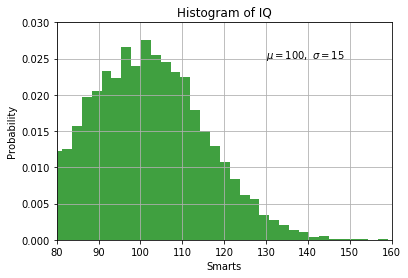

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15  # mean = 100, standard deviation=15
dataset = mu + sigma * np.random.randn(10000) # Return a sample (or samples) from the “standard normal” distribution.
print(dataset.size)

# the histogram of the data, to be investigated
n, bins, patches = plt.hist(dataset, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(130, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([80, 160, 0, 0.03])
plt.grid(True)
plt.show()

<p>Available Markers:</p>
<table border="1" class="docutils">
<colgroup>
<col width="38%" />
<col width="62%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">marker</th>
<th class="head">description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>&#8221;.&#8221;</td>
<td>point</td>
</tr>
<tr class="row-odd"><td>&#8221;,&#8221;</td>
<td>pixel</td>
</tr>
<tr class="row-even"><td>&#8220;o&#8221;</td>
<td>circle</td>
</tr>
<tr class="row-odd"><td>&#8220;v&#8221;</td>
<td>triangle_down</td>
</tr>
<tr class="row-even"><td>&#8220;^&#8221;</td>
<td>triangle_up</td>
</tr>
<tr class="row-odd"><td>&#8220;&lt;&#8221;</td>
<td>triangle_left</td>
</tr>
<tr class="row-even"><td>&#8220;&gt;&#8221;</td>
<td>triangle_right</td>
</tr>
<tr class="row-odd"><td>&#8220;1&#8221;</td>
<td>tri_down</td>
</tr>
<tr class="row-even"><td>&#8220;2&#8221;</td>
<td>tri_up</td>
</tr>
<tr class="row-odd"><td>&#8220;3&#8221;</td>
<td>tri_left</td>
</tr>
<tr class="row-even"><td>&#8220;4&#8221;</td>
<td>tri_right</td>
</tr>
<tr class="row-odd"><td>&#8220;8&#8221;</td>
<td>octagon</td>
</tr>
<tr class="row-even"><td>&#8220;s&#8221;</td>
<td>square</td>
</tr>
<tr class="row-odd"><td>&#8220;p&#8221;</td>
<td>pentagon</td>
</tr>
<tr class="row-even"><td>&#8220;*&#8221;</td>
<td>star</td>
</tr>
<tr class="row-odd"><td>&#8220;h&#8221;</td>
<td>hexagon1</td>
</tr>
<tr class="row-even"><td>&#8220;H&#8221;</td>
<td>hexagon2</td>
</tr>
<tr class="row-odd"><td>&#8220;+&#8221;</td>
<td>plus</td>
</tr>
<tr class="row-even"><td>&#8220;x&#8221;</td>
<td>x</td>
</tr>
<tr class="row-odd"><td>&#8220;D&#8221;</td>
<td>diamond</td>
</tr>
<tr class="row-even"><td>&#8220;d&#8221;</td>
<td>thin_diamond</td>
</tr>
<tr class="row-odd"><td>&#8220;|&#8221;</td>
<td>vline</td>
</tr>
<tr class="row-even"><td>&#8220;_&#8221;</td>
<td>hline</td>
</tr>
<tr class="row-odd"><td>TICKLEFT</td>
<td>tickleft</td>
</tr>
<tr class="row-even"><td>TICKRIGHT</td>
<td>tickright</td>
</tr>
<tr class="row-odd"><td>TICKUP</td>
<td>tickup</td>
</tr>
<tr class="row-even"><td>TICKDOWN</td>
<td>tickdown</td>
</tr>
<tr class="row-odd"><td>CARETLEFT</td>
<td>caretleft</td>
</tr>
<tr class="row-even"><td>CARETRIGHT</td>
<td>caretright</td>
</tr>
<tr class="row-odd"><td>CARETUP</td>
<td>caretup</td>
</tr>
<tr class="row-even"><td>CARETDOWN</td>
<td>caretdown</td>
</tr>
<tr class="row-odd"><td>&#8220;None&#8221;</td>
<td>nothing</td>
</tr>
<tr class="row-even"><td>None</td>
<td>nothing</td>
</tr>
<tr class="row-odd"><td>&#8221; &#8220;</td>
<td>nothing</td>
</tr>
<tr class="row-even"><td>&#8220;&#8221;</td>
<td>nothing</td>
</tr>
<tr class="row-odd"><td><code class="docutils literal"><span class="pre">'$...$'</span></code></td>
<td>render the string using mathtext.</td>
</tr>
<tr class="row-even"><td><code class="xref py py-obj docutils literal"><span class="pre">verts</span></code></td>
<td>a list of (x, y) pairs used for Path vertices.
The center of the marker is located at (0,0) and
the size is normalized.</td>
</tr>
<tr class="row-odd"><td>path</td>
<td>a <a class="reference internal" href="path_api.html#matplotlib.path.Path" title="matplotlib.path.Path"><code class="xref py py-obj docutils literal"><span class="pre">Path</span></code></a> instance.</td>
</tr>
<tr class="row-even"><td>(<code class="xref py py-obj docutils literal"><span class="pre">numsides</span></code>, <code class="xref py py-obj docutils literal"><span class="pre">style</span></code>, <code class="xref py py-obj docutils literal"><span class="pre">angle</span></code>)</td>
<td>see below</td>
</tr>
</tbody>
</table>

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
myFirstFigure = plt.figure("hello world numpy plot")

<Figure size 432x288 with 0 Axes>

In [0]:
subplot_1 = myFirstFigure.add_subplot(2, 3, 1) # 2 rows 3 columns, number1 subplot ()
subplot_6 = myFirstFigure.add_subplot(2, 3, 6) # number6 subplot (last one)


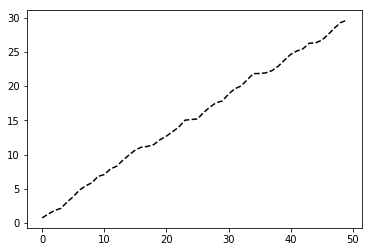

In [5]:
plt.plot(np.random.rand(50).cumsum(), 'k--') # 50 elements cumulative sum, k is black and -- is straigh lines
plt.show()

more examples can be found from a2b2c helloworld1.ipynb

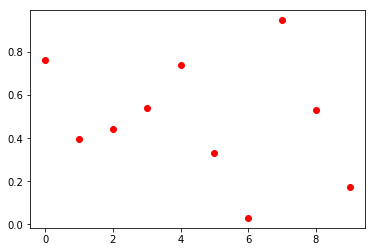

In [6]:
subplot_1 = myFirstFigure.add_subplot(2, 3, 2)
plt.plot(np.random.rand(10) , 'ro') # red, circle
plt.show()

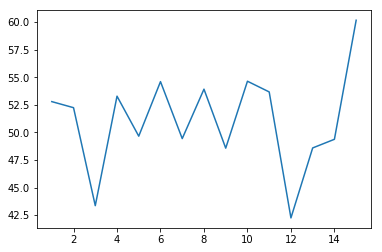

In [7]:
data_set_size = 15
low_mu, low_sigma = 50, 4.3
low_data_set = low_mu + low_sigma * np.random.randn(data_set_size) # generate 15 data points, normally distrubted with mean 50, standard deviation 4.3
high_mu, high_sigma = 57, 5.2
high_data_set = high_mu + high_sigma * np.random.randn(data_set_size) #generate 15 data points, normally distrubted with mean 57, standard deviation 5.2

days = list(range(1, data_set_size + 1)) # x axis

plt.plot(days, low_data_set) # default use lines
plt.show()

Multiple lines in a plot

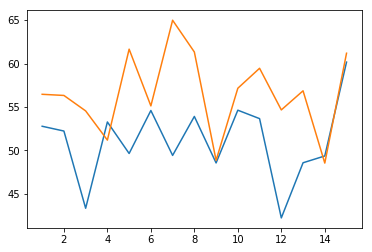

In [8]:
plt.plot(days, low_data_set,         
         days, high_data_set) # 2 data sets are drawn here
plt.show()

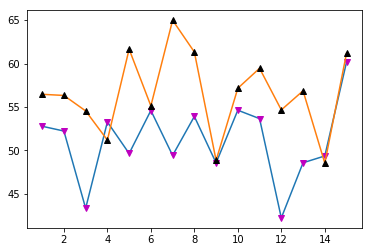

In [9]:
# marker table above, v is down arrow, ^ is upper arrow
plt.plot(days, low_data_set,
         days, low_data_set, "vm", # lower triangle, color is meganta
         days, high_data_set, 
         days, high_data_set, "^k") # upper triangle, color is black
plt.show() # 4 data sets are drawn here

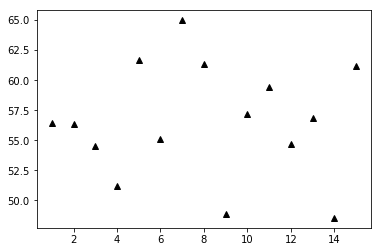

In [10]:
plt.plot(days, high_data_set, "^k")
plt.show() # 1 data set is drawn here

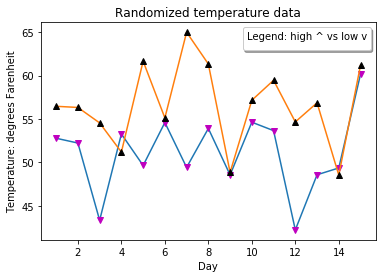

In [11]:
# Add the x,y labels and title, legend is more a text box here
plt.plot(days, low_data_set,
         days, low_data_set, "vm",
         days, high_data_set, 
         days, high_data_set, "^k")
plt.xlabel('Day')
plt.ylabel('Temperature: degrees Farenheit')
plt.title('Randomized temperature data')
plt.legend(loc="upper right", shadow=True, title="Legend: high ^ vs low v")
plt.show()

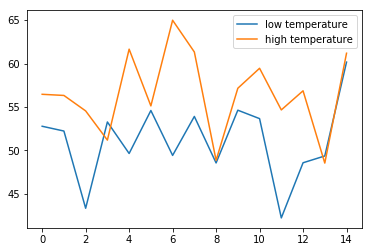

In [12]:
line1, = plt.plot(low_data_set)
line2, = plt.plot(high_data_set)
line1.set_label('low temperature')
line2.set_label('high temperature')
plt.legend()

Mark, Label and Grid

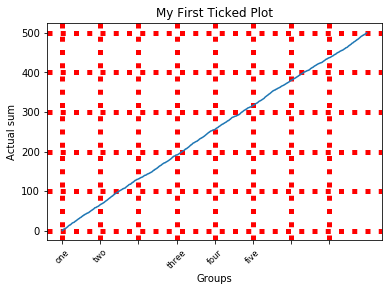

In [25]:
number_of_data_points = 1000

my_figure = plt.figure()
subplot_1 = my_figure.add_subplot(1, 1, 1) # only one subplot in this figure
subplot_1.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

number_of_ticks = 8
ticks = np.arange(0, number_of_data_points, number_of_data_points//number_of_ticks) # (0~1000, integer 0~125)
subplot_1.set_xticks(ticks) # this won't be displayed on the subplot, only scales it

labels = subplot_1.set_xticklabels(['one', 'two', '', 'three', 'four', 'five'], rotation=45, fontsize='small')

subplot_1.set_title ("My First Ticked Plot")
subplot_1.set_xlabel ("Groups")
subplot_1.set_ylabel ("Actual sum")


#subplot_1.grid(True)
#gridlines = subplot_1.get_xgridlines() + subplot_1.get_ygridlines()
#for line in gridlines:
#    line.set_linestyle(':')

# comment out grid example above and use a simpler one

subplot_1.grid(color='r', linestyle=':', linewidth=5)
plt.show()

Line styles for grid lines
<list>
    <li>-    solid line</li>
    <li>--   dashed line</li>
    <li>-.   dash dot line</li>
    <li>:    dotted</li>
</list>

More information about lines available at: http://matplotlib.org/api/lines_api.html

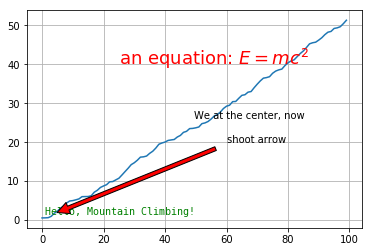

In [38]:
# remove grid but add text box
number_of_data_points = 100

my_figure2 = plt.figure()
subplot_1 = my_figure2.add_subplot(1, 1, 1) # only one subplot in this figure
subplot_1.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

subplot_1.grid(None) # somehow after it's set to none, the grid is still here
subplot_1.text (25, 40, r'an equation: $E=mc^2$', fontsize=18, color='red') # x=25, y=40 r'  accepts regex
subplot_1.text (1, 1.5, "Hello, Mountain Climbing!", family='monospace', fontsize=10, color='green')

# add text box at the center 0.5 here means 50%, more on transform http://matplotlib.org/users/transforms_tutorial.html
subplot_1.text(0.5, 0.5, b"We at the center, now", transform=subplot_1.transAxes)

# the allow start from xytext and points to xy
subplot_1.annotate('shoot arrow', xy=(2, 1), xytext=(60, 20),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

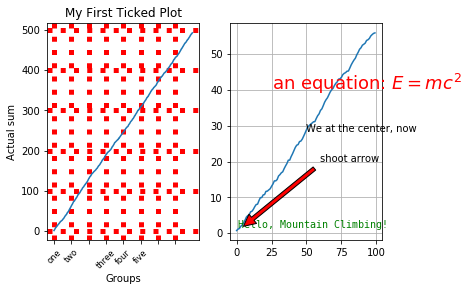

In [41]:
Show above graphs side by side

number_of_data_points = 1000

my_figure = plt.figure()
subplot_1 = my_figure.add_subplot(1, 2, 1) # only one subplot in this figure
subplot_1.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

number_of_ticks = 8
ticks = np.arange(0, number_of_data_points, number_of_data_points//number_of_ticks) # (0~1000, integer 0~125)
subplot_1.set_xticks(ticks) # this won't be displayed on the subplot, only scales it

labels = subplot_1.set_xticklabels(['one', 'two', '', 'three', 'four', 'five'], rotation=45, fontsize='small')

subplot_1.set_title ("My First Ticked Plot")
subplot_1.set_xlabel ("Groups")
subplot_1.set_ylabel ("Actual sum")

subplot_1.grid(color='r', linestyle=':', linewidth=5)


# remove grid but add text box
number_of_data_points = 100

#my_figure2 = plt.figure()
subplot_2 = my_figure.add_subplot(1, 2, 2) # only one subplot in this figure
subplot_2.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

subplot_2.grid(None) # somehow after it's set to none, the grid is still here
subplot_2.text (25, 40, r'an equation: $E=mc^2$', fontsize=18, color='red') # x=25, y=40 r'  accepts regex
subplot_2.text (1, 1.5, "Hello, Mountain Climbing!", family='monospace', fontsize=10, color='green')

# add text box at the center 0.5 here means 50%, more on transform http://matplotlib.org/users/transforms_tutorial.html
subplot_2.text(0.5, 0.5, b"We at the center, now", transform=subplot_2.transAxes)

# the allow start from xytext and points to xy
subplot_2.annotate('shoot arrow', xy=(2, 1), xytext=(60, 20),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

More legend example: http://matplotlib.org/examples/pylab_examples/legend_demo2.html

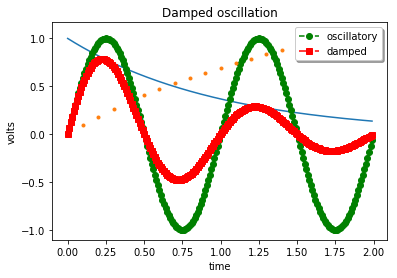

In [14]:
t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(t2, np.exp(-t2))
l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', t1, np.log(1 + t1), '.')
l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

plt.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)
plt.xlabel('time')
plt.ylabel('volts')
plt.title('Damped oscillation')
plt.show()